In [2]:
from google.colab import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json
import os
from pathlib import Path

from subprocess import Popen, PIPE, STDOUT
from glob import glob
uploaded = files.upload()
uploadedOne = files.upload()
uploadedTwo = files.upload()
uploadedThree = files.upload()


Saving arc-agi_evaluation_challenges.json (1).zip to arc-agi_evaluation_challenges.json (1) (1).zip


Saving arc-agi_evaluation_solutions.json to arc-agi_evaluation_solutions.json


Saving arc-agi_training_challenges.json.zip to arc-agi_training_challenges.json.zip


Saving arc-agi_training_solutions.json to arc-agi_training_solutions.json


Load the JSON File


In [29]:
with open('arc-2024/arc-agi_training_challenges.json', 'r') as file:
    training_challenges = json.load(file)

with open('arc-2024/arc-agi_training_solutions.json', 'r') as file:
    training_solutions = json.load(file)

# Load the evaluation challenges and solutions
with open('arc-2024/arc-agi_evaluation_challenges.json(1)', 'r') as file:
    evaluation_challenges = json.load(file)

with open('arc-2024/arc-agi_evaluation_solutions.json', 'r') as file:
    evaluation_solutions = json.load(file)


FileNotFoundError: [Errno 2] No such file or directory: 'uploaded'

Load the colormap

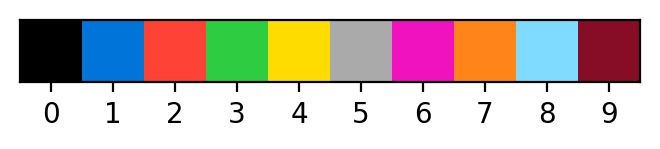

In [11]:
_cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

Define functions


In [15]:
def plot_task(task, task_solutions, task_index, task_type):
    """Plots the train and test pairs of a specified task using a color scheme similar to the ARC app."""

    num_train_samples = len(task['train'])
    num_test_samples = len(task['test'])

    total_columns = num_train_samples + num_test_samples
    fig, axs = plt.subplots(2, total_columns, figsize=(3 * total_columns, 6))
    plt.suptitle(f'Set #{task_index}, {task_type}:', fontsize=20, fontweight='bold', y=1)

    for idx in range(num_train_samples):
        plot_single(axs[0, idx], task['train'][idx]['input'], 'train', 'input')
        plot_single(axs[1, idx], task['train'][idx]['output'], 'train', 'output')

    plot_single(axs[0, num_train_samples], task['test'][0]['input'], 'test', 'input')

    cmap = colors.ListedColormap([
        '#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    norm = colors.Normalize(vmin=0, vmax=9)
    test_output_matrix = task_solutions

    axs[1, num_train_samples].imshow(test_output_matrix, cmap=cmap, norm=norm)
    axs[1, num_train_samples].grid(True, which='both', color='lightgrey', linewidth=0.5)
    axs[1, num_train_samples].set_xticks([x - 0.5 for x in range(1 + len(test_output_matrix[0]))])
    axs[1, num_train_samples].set_yticks([x - 0.5 for x in range(1 + len(test_output_matrix))])
    axs[1, num_train_samples].set_xticklabels([])
    axs[1, num_train_samples].set_yticklabels([])
    axs[1, num_train_samples].set_title('TEST OUTPUT', color='green', fontweight='bold')

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black')
    fig.patch.set_facecolor('#dddddd')

    plt.tight_layout()
    plt.show()
    print()
    print()

def plot_single(ax, matrix, phase, matrix_type):
    """Helper function to plot a single matrix with specified phase and type labels."""
    cmap = colors.ListedColormap([
        '#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    norm = colors.Normalize(vmin=0, vmax=9)

    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(f'{phase} {matrix_type}', fontweight='bold')

Output graphs


In [30]:
for index in range(5):
    # Get the task name
    task_name = list(training_challenges.keys())[index]

    # Retrieve the task and its solution
    task_data = training_challenges[task_name]
    task_solution = training_solutions[task_name][0]

    # Plot the task and its solution
    plot_task(task_data, task_solution, index, task_name)

NameError: name 'training_challenges' is not defined

Train the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

Evaluate the accuracy


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')